In [7]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('credit card.csv')
df.head()

,Age,Income,CreditScore,DebtToIncomeRatio,Default
0,52,50000,710,0.30,0
1,45,60000,690,0.20,1
2,50,80000,730,0.25,0
3,43,55000,680,0.35,1
4,60,70000,750,0.28,0


In [15]:
# Features (X) and Target (y)
X = df[['Age','Income', 'CreditScore', 'DebtToIncomeRatio']]
y = df['Default']
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Display model performance
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Model Performance:
Accuracy: 0.83
Precision: 0.67
Recall: 1.00
F1 Score: 0.80

Confusion Matrix:
[[11  4]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.67      1.00      0.80         8

    accuracy                           0.83        23
   macro avg       0.83      0.87      0.82        23
weighted avg       0.88      0.83      0.83        23



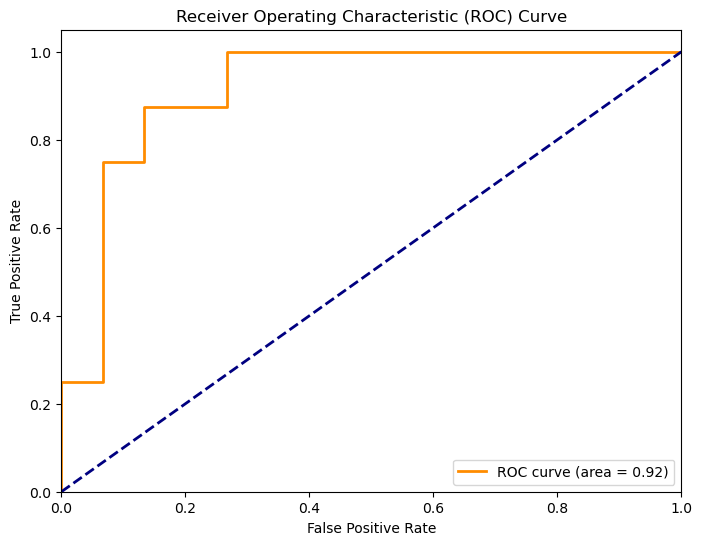

Cross-validation accuracy: 0.80 ± 0.07


In [23]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-validation for better generalization
cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")